In [8]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 5.0 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricte

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)


In [ ]:
# Source: https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')
#print(wd.page_source)

In [ ]:
user_message = wd.find_elements_by_xpath('//*[@id="Discussion_2864"]/div/div[2]/div/div[1]')[0] 
print(user_message.text)

Entry level performance luxury sedans are a hot area for car manufacturers and enthusiasts alike. These sedans show their performance by being fun to drive and handling well. They show luxury by offering leather and some of the important creatures comforts found in the most luxurious upscale sedans. The selection of vehicles that compete in the space is vast and varied.

The benchmarks which define this are the BMW 330 and the Audi A4 3.0. But there are many contenders, such as Acura TL-S, Chrysler 300M, Jaguar X-type, Infiniti I35, Mercedes C-Class, Volvo S60 T5. Some companies have contenders that emphasize performance Lexus IS300 or luxury Lexus ES300. And the field is continously growing, with the recent additions being the Cadillac CTS and Infiniti G35.

The common charateristics of this entry level perfomance luxury group seem to a price around 30 to 40k (US dollars) and 0-60 times between six and eight seconds.

With this wide variety of cars targeted at a similar market segment

In [ ]:
date = wd.find_elements_by_xpath('//*[@id="Discussion_2864"]/div/div[1]/div[2]/span[1]/a/time')[0] 
print(date.text)
time = date.get_attribute('title')
print(time)

March 2002
March 23, 2002 12:04PM


In [9]:
import pandas as pd
import numpy as np

In [ ]:
page_number_list = ['p'+str(x) for x in list(np.arange(2,330))]

In [ ]:
final_df_newest = pd.DataFrame()
for p in page_number_list:
  wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p')

  comments = pd.DataFrame(columns = ['Date','comments']) 
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[2]/div[2]/span/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,comment]
    
  final_df_newest = pd.concat([comments,final_df_newest])
print(final_df_newest.shape[0])

16400


In [ ]:
## Scraping for Old Posts

In [ ]:
page_number_list = ['p'+str(x) for x in list(np.arange(330,436))]

In [ ]:
final_df_oldest = pd.DataFrame()
for p in page_number_list:
  wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p')

  comments = pd.DataFrame(columns = ['Date','comments']) 
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_') and not (contains(@id,'blockquote'))]")

  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[2]/div[2]/span/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,comment]
    
  final_df_oldest = pd.concat([comments,final_df_oldest])
print(final_df_oldest.shape[0])

5300


In [ ]:
final_df_newest

,Date,comments
0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",One beauty of BMW 3 Series is that there are s...
...,...,...
45,"April 24, 2002 7:51AM","So, if you read through most of this group, al..."
46,"April 24, 2002 5:15PM",Have you driven them both? The S4 really moves...
47,"April 25, 2002 12:36PM","I've tested the 3.0, not the S4. Hmmm... new S..."
48,"April 26, 2002 9:50AM","Yeah, the current S4 has 250 hp and 258 lb-ft ..."


In [ ]:
master_df

,Date,comments
0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",One beauty of BMW 3 Series is that there are s...
...,...,...
45,"April 24, 2002 7:51AM","So, if you read through most of this group, al..."
46,"April 24, 2002 5:15PM",Have you driven them both? The S4 really moves...
47,"April 25, 2002 12:36PM","I've tested the 3.0, not the S4. Hmmm... new S..."
48,"April 26, 2002 9:50AM","Yeah, the current S4 has 250 hp and 258 lb-ft ..."


In [ ]:
master_df = pd.concat([final_df_newest,final_df_oldest])

master_df.to_csv("results.csv")
!ls
from google.colab import files
files.download("results.csv")

results.csv  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files

In [5]:
files.upload()

Saving results.csv to results.csv


In [10]:
master_df = pd.read_csv('results.csv')

In [13]:
# Taking newest 5000 comments
newest_df = master_df.tail(5000)

In [14]:
newest_df.sample(10)

,Unnamed: 0,Date,comments
18957,7,"March 26, 2002 2:45PM",I understand it's not about the speed. I reall...
19971,21,"March 28, 2002 5:07PM","mbarto... As regards the ""bribes"" issue, you'v..."
20307,7,"March 26, 2002 2:45PM",I understand it's not about the speed. I reall...
20681,31,"April 14, 2002 1:09AM","I think both are excellent(sp?) cars, however ..."
17494,44,"April 21, 2002 6:50AM","cybersol... From what I've read, the better va..."
20553,3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
19778,28,"April 9, 2002 2:43PM",Go drive one. They're a blast and for the mone...
19977,27,"April 9, 2002 2:12PM","Sorry, I thought that I had already taken up t..."
17530,30,"April 12, 2002 7:53AM","Well I'm a Benz fan first and foremost, but th..."
20233,33,"April 17, 2002 12:37PM",There is not much to debate on this subject. I...


# Task A: Test Zipf's Law on the dataset

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
from collections import Counter
p = Counter(" ".join(newest_df['comments']).split()).most_common(100)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])

In [36]:
rslt

,Word,Frequency,log_freq,index,log_rank
0,the,29100,10.278493,0,-inf
1,to,12800,9.457200,1,0.000000
2,and,12300,9.417355,2,0.693147
3,a,12200,9.409191,3,1.098612
4,I,11300,9.332558,4,1.386294
...,...,...,...,...,...
95,time,800,6.684612,95,4.553877
96,keep,800,6.684612,96,4.564348
97,over,800,6.684612,97,4.574711
98,say,800,6.684612,98,4.584967


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency')

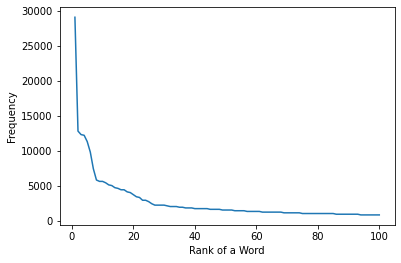

In [37]:
plt.plot(rslt.index+1,rslt['Frequency'])
plt.xlabel('Rank of a Word')
plt.ylabel('Frequency')

Based on the graph, we can see that rank and frequency of frequency distribution of words follow Zipf's law

Task B: Find Top 10 Brands

In [42]:
# Remove stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
from nltk.corpus import stopwords

In [ ]:
newest_df['comments'] = newest_df['comments'].apply(lambda x: x.lower())
newest_df['word_tokens'] = newest_df['comments'].apply(lambda x: nltk.word_tokenize(x))

def remove_stopwords(text):
  return [word for word in text if word not in stopwords.words('english')]

newest_df['comments_new'] = newest_df['word_tokens'].apply(remove_stopwords)

In [ ]:
newest_df['comments_new'] = [' '.join(x) for x in newest_df['comments_new']]

In [78]:
p = Counter(" ".join(newest_df['comments_new']).split()).most_common()
rslt_wo_stopwords = pd.DataFrame(p, columns=['Word', 'Frequency'])

In [71]:
files.upload()

Saving car models and brands.csv to car models and brands.csv


{'car models and brands.csv': b'Brand,Model\r\nacura,integra\r\nacura,legend\r\nacura,vigor\r\nacura,rlx\r\nacura,ilx\r\nacura,mdx\r\nacura,rdx\r\nacura,tsx\r\nacura,rsx\r\naudi,quattro\r\naudi,a4\r\naudi,a6\r\naudi,a5\r\naudi,a7\r\naudi,q3\r\naudi,q5\r\naudi,q7\r\naudi,a8\r\naudi,a3\r\nbmw,3-series\r\nbmw,5-series\r\nbmw,6-series\r\nbmw,4-series\r\nbmw,xdrive\r\nbmw,alpina\r\nbmw,330ci\r\nbmw,328i\r\nbmw,330c\r\nbmw,335i\r\nbmw,335d\r\nbmw,528i\r\nbmw,535i\r\nbmw,128i\r\nbmw,640i\r\nbmw,3er\r\nbmw,5er\r\nbmw,m5\r\nbmw,m3\r\nbmw,m6\r\nbmw,bmws\r\nbmw,bmwesque\r\nbuick,park avenue\r\nbuick,la crosse\r\nbuick,lacrosse\r\nbuick,century\r\nbuick,enclave\r\nbuick,encore\r\nbuick,regal\r\nbuick,buicks\r\ncadillac,escalade\r\ncadillac,srx\r\ncadillac,xts\r\ncar,cars\r\nchevrolet,grand blazer\r\nchevrolet,trailblazer\r\nchevrolet,trailblazer\r\nchevrolet,silverado\r\nchevrolet,colorado\r\nchevrolet,corvette\r\nchevrolet,suburban\r\nchevrolet,cavalier\r\nchevrolet,caprice\r\nchevrolet,captiva\r

In [72]:
car_models = pd.read_csv('car models and brands.csv')

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

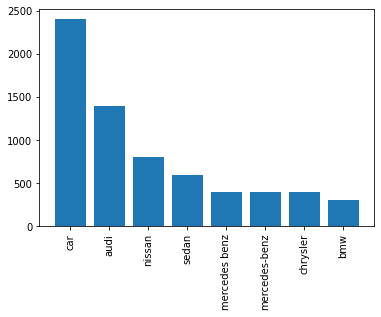

In [99]:
top_10models = rslt_wo_stopwords[rslt_wo_stopwords['Word'].isin(car_models['Model'].unique())][:10]
top_10_brands = pd.merge(top_10models,car_models,left_on='Word',right_on=['Model'])[:10]
plt.bar(top_10_brands['Brand'],top_10_brands['Frequency'])
plt.xticks(rotation='90')